# Lab 11: Bootstrap

Suppose $x_1, \ldots, x_{10} \sim \operatorname{Normal}\left(\mu, \sigma^2\right)$. Let $\hat{\mu}$ be an estimator of $\mu$. It could be the sample mean, sample median, maximum likelihood estimator, or any point estimator. We will calculate $\operatorname{var}(\hat{\mu})$ using bootstrap samples.

In [1]:
data = rnorm(10, mean=4, sd=2)
sample_median = median(data)
sample_median

[1] 2.788535

## Parametric bootstrap:
We estimate the unknown parameters, $\hat{\mu}_{MLE}=\bar{x}$ and $\widehat{\sigma^2}_{MLE}=$ sample variance

In [2]:
mu_hat = mean(data)
var_hat = var(data)

Generate $k$ bootstrap samples from the $Normal(\hat{\mu}_{MLE}, \widehat{\sigma^2}_{MLE})$

In [3]:
k=100
bootstrap_sample = matrix(0, nrow=10, ncol=k)
for(i in 1:k){
  bootstrap_sample[,i] = rnorm(10, mean=mu_hat, sd=sqrt(var_hat))
}

Calculate $\hat{\mu}$, i.e., the sample median for each bootstrap sample, $\left\{\widehat{\mu_1}, \ldots, \widehat{\mu_k}\right\}$

In [4]:
sample_median = 1:k
for(i in 1:k){
  sample_median[i] = median(bootstrap_sample[,i])
}
sample_median

[1] 3.620065 2.843209 2.942301 3.783990 3.529207 3.168778 4.067027 3.650464
  [9] 2.861164 3.554054 3.962403 2.633205 4.004966 3.751390 3.605643 3.692387
 [17] 5.106583 2.698093 3.458309 2.259555 2.673112 3.212393 3.912493 3.424083
 [25] 1.692453 3.463119 1.967636 3.456920 3.315537 3.921142 4.322089 3.875478
 [33] 3.434586 4.429104 2.569252 4.254572 3.114361 3.516279 3.167024 4.383255
 [41] 4.091448 3.416204 2.512573 3.774481 4.256118 2.781795 4.146491 3.285017
 [49] 4.194404 3.744863 2.961889 3.274276 3.079102 3.221765 3.267791 2.839467
 [57] 3.192816 3.049652 3.516537 3.488280 2.166539 1.854691 2.251902 3.193267
 [65] 4.001129 2.750015 3.874008 3.846521 2.623330 4.090410 4.132522 3.765880
 [73] 4.465493 2.753352 2.717914 3.103121 2.048872 3.241681 4.522881 4.233717
 [81] 2.309087 3.992463 2.642877 3.339116 3.011910 2.790211 3.515006 3.060969
 [89] 3.465160 3.745768 4.411263 3.091786 3.936357 2.844665 3.129872 3.040936
 [97] 2.808800 2.958292 3.546433 3.451485

Calculate the sample variance $S^2$ of $\left\{\widehat{\mu_1}, \ldots, \widehat{\mu_k}\right\}$, i.e., $\frac{1}{k-1} \sum_{i=1}^k\left(\widehat{\mu_i}-\widehat{\mu}\right)^2$ and $\operatorname{var}(\hat{\mu}) \approx S^2$

In [5]:
var(sample_median)

[1] 0.430934

## Nonparametric bootstrap
We generate bootstrap samples by resampling the original data with replacement.

In [6]:
bootstrap_sample = matrix(0, nrow=10, ncol=k)
for(i in 1:k){
  bootstrap_sample[,i] = sample(data,10,replace=T)
}

We calculate the sample median for each bootstrap sample

In [7]:
sample_median = 1:k
for(i in 1:k){
  sample_median[i] = median(bootstrap_sample[,i])
}
sample_median

[1] 2.883514 2.057217 2.733121 2.005345 1.961697 2.883514 2.883514 2.450583
  [9] 1.953472 2.828101 3.983139 2.395169 2.923081 2.005345 2.923081 3.413543
 [17] 2.395169 2.828101 2.923081 2.395169 2.843948 2.828101 4.491126 2.923081
 [25] 2.355062 2.883514 3.453110 2.057217 1.953472 2.883514 2.057217 2.788535
 [33] 2.733121 2.057217 2.788535 3.413543 3.983139 2.343297 2.057217 4.530692
 [41] 2.057217 2.788535 3.453110 2.843948 2.733121 5.060722 2.883514 2.005345
 [49] 2.883514 2.057217 2.005345 2.828101 2.438276 1.953472 2.343297 2.733121
 [57] 2.788535 2.733121 2.883514 3.453110 2.733121 3.453110 2.395169 2.843948
 [65] 2.828101 2.005345 2.788535 3.453110 2.299649 2.843948 2.057217 2.788535
 [73] 2.788535 3.983139 2.733121 5.060722 3.358130 1.953472 2.005345 3.413543
 [81] 1.909824 2.923081 2.057217 2.733121 2.395169 1.961697 2.788535 2.005345
 [89] 2.057217 2.883514 3.413543 2.395169 2.343297 2.057217 2.395169 2.057217
 [97] 3.413543 2.450583 2.395169 2.923081

We calculate the sample variance $S^2$ of $\left\{\widehat{\theta_1}, \ldots, \widehat{\theta_k}\right\}$, i.e., $\frac{1}{k-1} \sum_{i=1}^k\left(\widehat{\theta_t}-\widehat{\theta}\right)^2$ and $\operatorname{var}(\hat{\theta}) \approx S^2$

In [8]:
var(sample_median)

[1] 0.435466

## Building bootstrap phylogenetic trees
We build a distance phylogenetic tree using the DNA alignment in test.phy.

Loading required package: ape



Loading required package: Matrix




Attaching package: ‘phybase’




The following objects are masked from ‘package:ape’:

    dist.dna, node.height




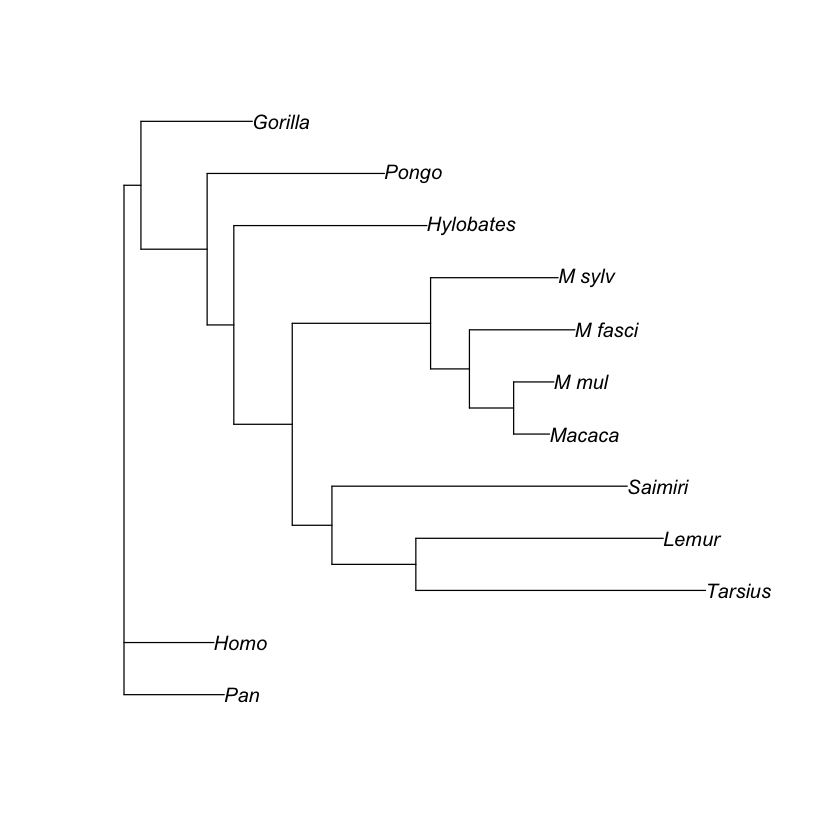

In [9]:
library(phybase)
data = read.dna.seq("./data/lab15_primates.phy",format="phylip")
seq = data$seq
d = dist.dna(seq)
rownames(d) = data$name
plot(nj(d))

We generate 100 nonparametric boostrap samples, i.e., resampling columns of the DNA alignment with replacement. Then, we build a tree for each bootstrap sample.

100 phylogenetic trees

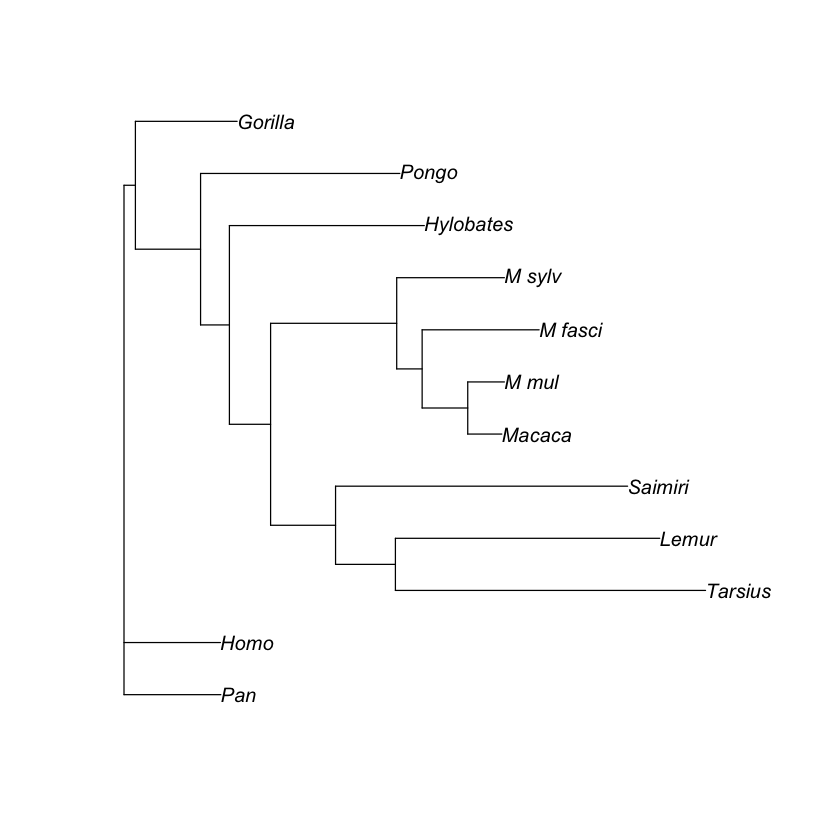

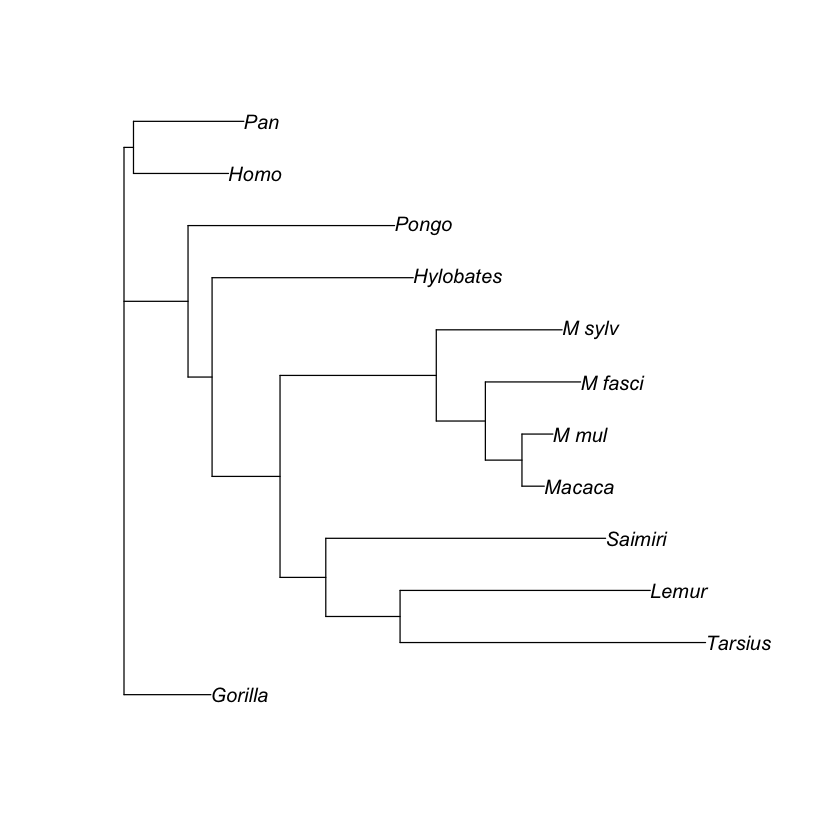

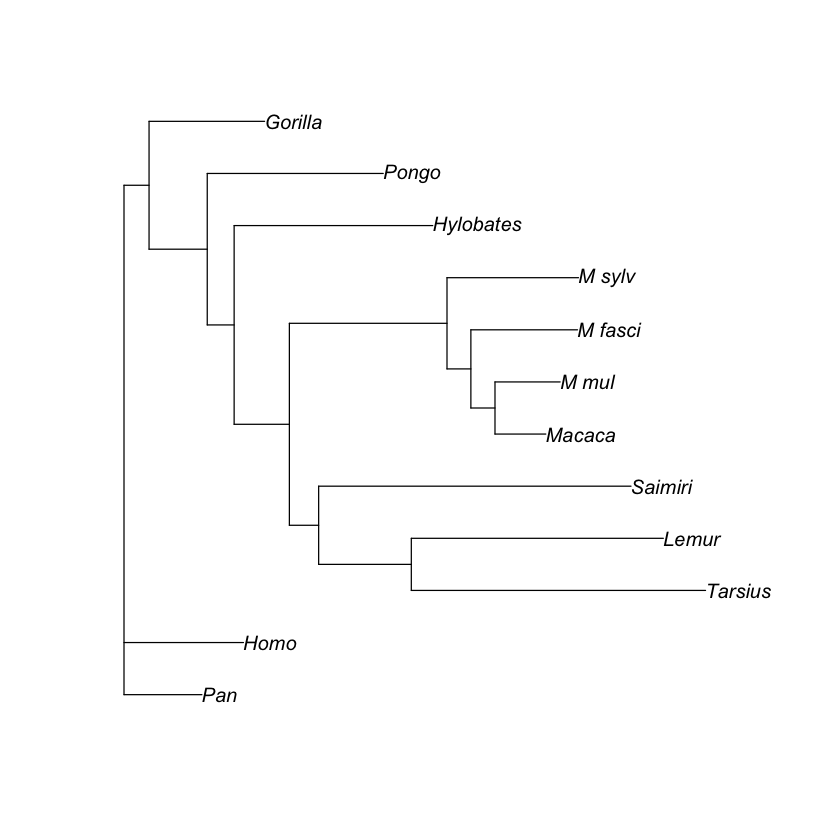

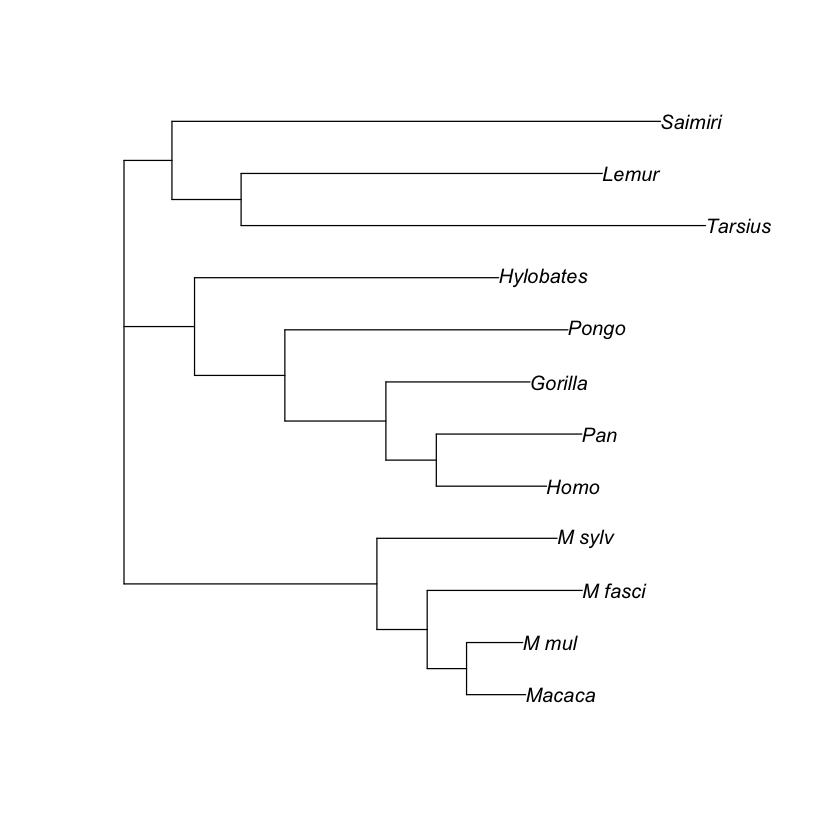

In [10]:
ncol = dim(seq)[2]
nbootstrap = 100
bootstrap_tree = rep("",nbootstrap)

for(i in 1:nbootstrap){
  columns = sample(1:ncol,ncol,replace=T)
  bootstrap_sample = seq[,columns]
  d = dist.dna(bootstrap_sample)
  rownames(d) = data$name
  bootstrap_tree[i] = write.tree(nj(d))
}

trees = read.tree(text=bootstrap_tree)
trees

plot(trees[1])
plot(trees[2])
plot(trees[3])
plot(trees[4])